# Seaborn

**Seaborn** 은 Statistical Data Visualization의 약자_통계를 기반으로 한 시각화

**PDF(Probability Density Function 확률 밀도 함수)** 라는 말을 많이 보게 될 것(정규분포표)

확률 밀도 함수는 데이터셋의 분포를 나타낸다

특정 구간의 확률은 그래프 아래 그 구간의 면적과 동일하다

그래프 아래의 모든 면적을 더하면 1이 된다.

**KDE(Kernel Density estimation)** 를 사용하면 굴국진 그래프를 얻을 수 있다.

In [1]:
!pip install seaborn==0.9.0

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
body_df = pd.read_csv('data/body.csv', index_col = 0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


In [5]:
body_df['Height']

Number
1       176.0
2       175.3
3       168.6
4       168.1
5       175.3
        ...  
996     171.8
997     171.5
998     177.9
999     174.4
1000    173.5
Name: Height, Length: 1000, dtype: float64

In [7]:
body_df['Height'].value_counts()

172.5    13
174.9    13
173.2    12
175.2    12
175.3    12
         ..
163.7     1
185.7     1
184.5     1
176.5     1
184.6     1
Name: Height, Length: 262, dtype: int64

In [8]:
# 키순으로 정리해보자
body_df['Height'].value_counts().sort_index()

154.4    1
155.5    1
157.4    1
157.8    1
158.0    1
        ..
190.3    1
191.2    1
191.8    1
192.4    1
193.1    1
Name: Height, Length: 262, dtype: int64

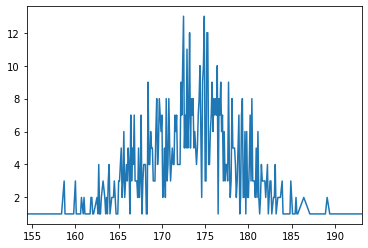

In [9]:
body_df['Height'].value_counts().sort_index().plot()

이제 ``seaborn`` 함수를 통해 위의 복잡한 그래프를 다시 그려볼 수 있다.

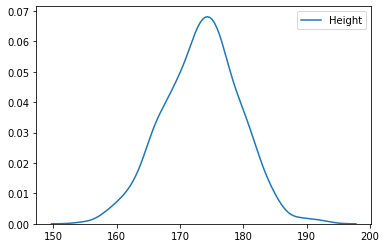

In [10]:
sns.kdeplot(body_df['Height'])

위 그래프가 확률 밀도 함수(PDF) 그래프이다

하지만 곡선이 지나치게 완만하여 실제 값을 조금 더 반영하고 싶을 떄엔 bw = 00  
bw는 히스토그램에서 bins 와 비슷한 역할을 한다고 보면 된다

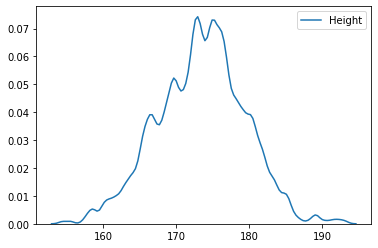

In [11]:
sns.kdeplot(body_df['Height'], bw = 0.5)

## 서울 지하철 승차인원

서울 지하철 역에 대한 승차인원 및 하차인원 정보로 KDE plot을 작성하기

In [12]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/subway.csv')

In [13]:
df.head()

,line,station,in,out
0,중앙선,지평,37,28
1,중앙선,용문,2064,2103
2,중앙선,원덕,375,357
3,중앙선,양평,4338,4378
4,중앙선,오빈,321,321


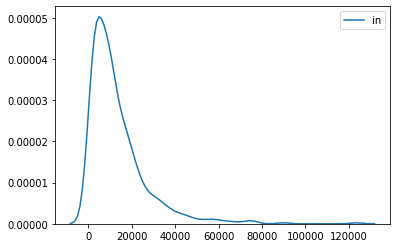

In [14]:
sns.kdeplot(df['in'])

## KDE 활용예시

꽤 많은 종류의 그래프에 적용될 수 있다.

아래는 히스토그램에 적용한 사례

In [1]:
import pandas as pd
import seaborn as sns

body_df = pd.read_csv('data/body.csv', index_col = 0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


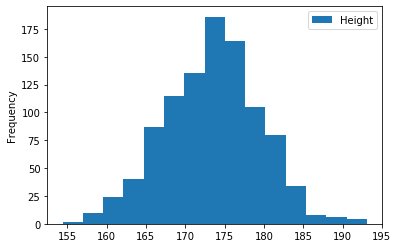

In [17]:
body_df.plot(kind = 'hist', y = 'Height', bins = 15)

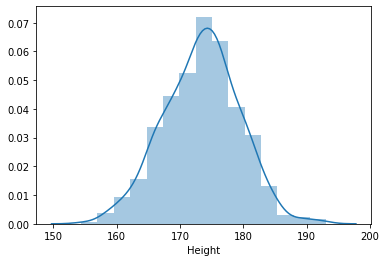

In [18]:
# seaborn을 사용한다면
sns.distplot(body_df['Height'], bins = 15)

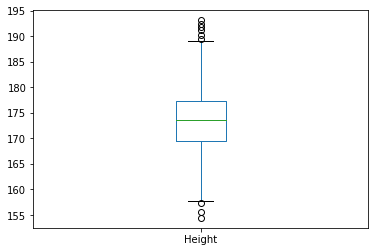

In [19]:
body_df.plot(kind='box', y= 'Height')

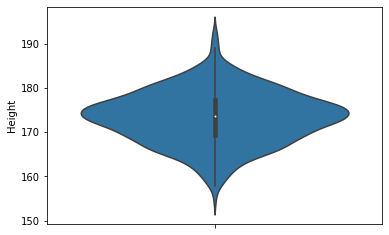

In [20]:
sns.violinplot(y = body_df['Height'])

위 플롯이 바이올른 플롯으로 불리는 이유는 현재와 다른 어떤 데이터를 넣었을 때 플롯의 모양새가 바이올린과

비슷하다하여 지어짐

다음은 키와 몸무게의 연관성을 보고 싶을 때

산점도를 그리면 될 것

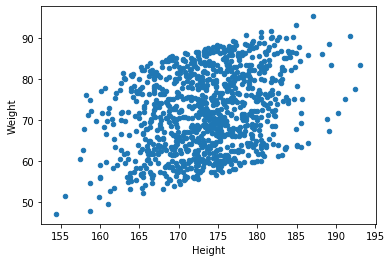

In [21]:
body_df.plot(kind = 'scatter', x = 'Height', y='Weight')

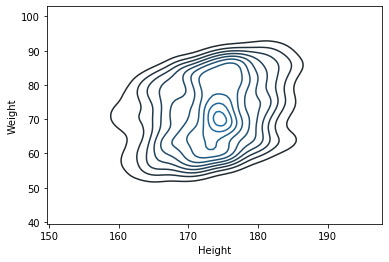

In [22]:
sns.kdeplot(body_df['Height'], body_df['Weight'])

위와 같이 등고선으로 표시할 수도 있음

왜 이와같은 등고선이 그려졌는지 각 축의 KDE를 통해 살펴보자

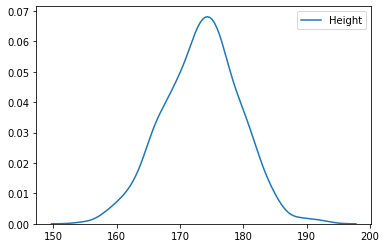

In [23]:
sns.kdeplot(body_df['Height'])

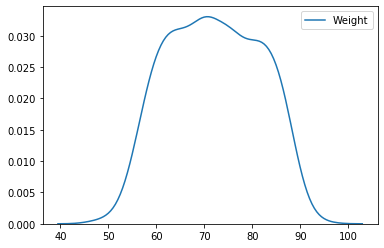

In [24]:
sns.kdeplot(body_df['Weight'])

## 교수님의 연봉은?

교수님들의 급여를 violin plot 으로 그려보자

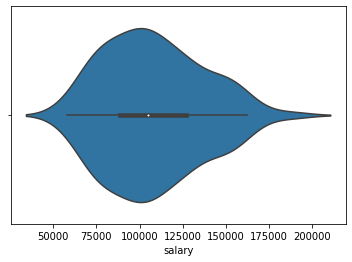

In [25]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/salaries.csv')

# 코드를 작성하세요.
sns.violinplot(x = df['salary'])

## LM plot

In [2]:
import pandas as pd
import seaborn as sns

body_df = pd.read_csv('data/body.csv', index_col = 0)
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


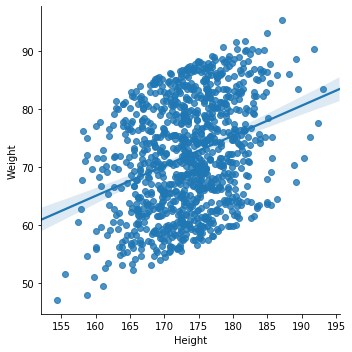

In [3]:
sns.lmplot(data=body_df, x = 'Height', y = 'Weight')

LM plot을 그리면 regression line(회귀선)이 그려진다
흩어진 점을 하나의 선으로 표현하려 해본 것

몸무게를 예측하는데에 선이 역할을 할 수 있지만 한계가 있다.

## 카테고리별 시각화

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
laptops_df = pd.read_csv('data/laptops.csv')
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [10]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

만약 OS 별로 가격대를 비교하고 싶다면 어떻게 해야할까?

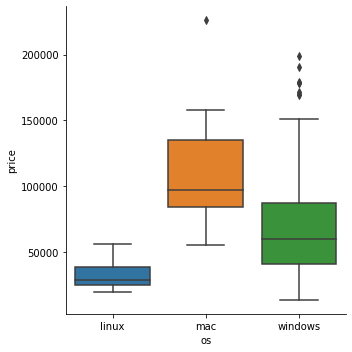

In [11]:
sns.catplot(data= laptops_df, x='os', y='price', kind = 'box')

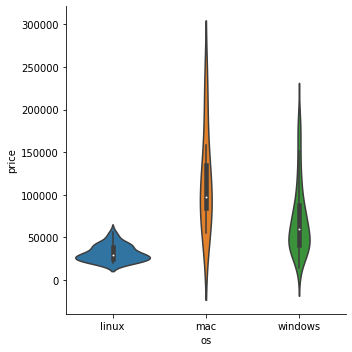

In [12]:
sns.catplot(data= laptops_df, x='os', y='price', kind = 'violin')

위와 같이 violin과 box 플롯으로 분포를 확인했지만 섞여있는 데이터에서

해당 자료들이 얼마나 현상을 잘 설명하는지 확인할 길이 없다.(각 cat별로 몇 개의 데이터가 있는지 모른다)

이 때는 **kind = 'strip'** 으로 변경하여보자

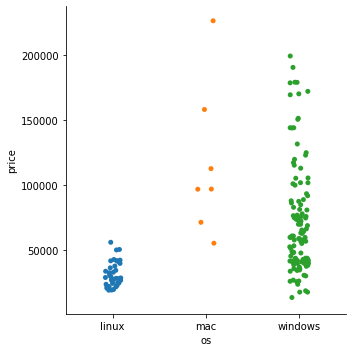

In [13]:
sns.catplot(data= laptops_df, x='os', y='price', kind = 'strip')

In [14]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

그런데 위 자료가 각자 어떤 프로세스를 활용하고 있는지도 확인하고 싶어졌다

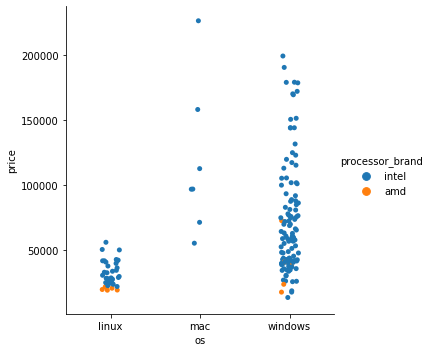

In [15]:
sns.catplot(data= laptops_df, x='os', y='price', kind = 'strip', hue = 'processor_brand')

하지만 ``strip`` 플롯으로 살펴볼 때엔 점들이 서로 겹쳐 보일 수 있어 이 때 사용하는 것이

``swarm`` 파라미터이다

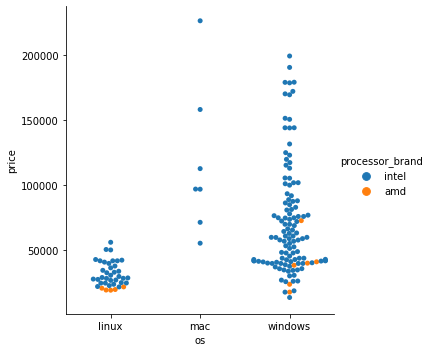

In [16]:
sns.catplot(data= laptops_df, x='os', y='price', kind = 'swarm', hue = 'processor_brand')

## 보험금 분석하기

보험회사에서 보험금이 어떻게 지출되었는지 분석하려 한다.

흡연 여부 카테고리에 따라 보험금을 살펴볼 수 있는 그래프를 그려라

In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


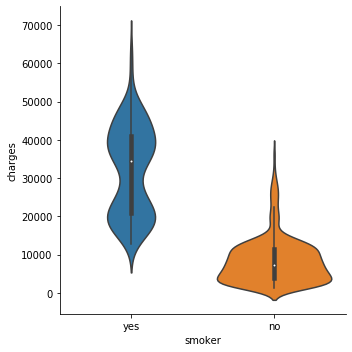

In [18]:
sns.catplot(data=df, x= 'smoker', y = 'charges', kind = 'violin')